In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.


In [34]:
df = pd.read_csv('/fish_data.csv')
print(df.head())

              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


In [28]:
df = pd.read_csv('/listings.csv')
print(df.head())


                    id                                               name  \
0   670339032744709144     Westwood lovely three bedrooms three bathrooms   
1             37014494      Spanish style lower duplex near Beverly Hills   
2  1024835174766068422                        Charming Beverly Hills Home   
3   850744632375448560                   Tianpu's warm room with bathroom   
4   953950676345326970  Santa Monica apt, free parking, steps to the b...   

     host_id host_name host_since  host_response_time  host_response_rate  \
0    4780152      Moon   20/01/13  within a few hours                0.96   
1  278288178       Ida   22/07/19                 NaN                 NaN   
2  513813179     Tiana   08/05/23        within a day                0.60   
3  432956623       Dan   22/11/21  a few days or more                0.20   
4  528669205   Farkhat   29/07/23      within an hour                1.00   

  host_is_superhost neighbourhood_cleansed neighbourhood_group_cleansed  .

<ipython-input-28-3810679f3f4c>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/listings.csv')


In [15]:
label_encoder = LabelEncoder()

df['name'] = label_encoder.fit_transform(df['name'])
df['host_response_time'] = label_encoder.fit_transform(df['host_response_time'])
df['host_is_superhost'] = label_encoder.fit_transform(df['host_is_superhost'])
df['neighbourhood_cleansed'] = label_encoder.fit_transform(df['neighbourhood_cleansed'])
df['neighbourhood_group_cleansed'] = label_encoder.fit_transform(df['neighbourhood_group_cleansed'])
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])
df['license'] = label_encoder.fit_transform(df['license'])
df['instant_bookable'] = label_encoder.fit_transform(df['instant_bookable'])
df['host_name'] = label_encoder.fit_transform(df['host_name'])

# df = le.fit(df_not_full, columns=['name', 'host_since', 'host_response_time','host_is_superhost',
#                                           'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type',
#                                           'room_type', 'license', 'instant_bookable'], drop_first=True )

In [4]:
df_encoded = pd.get_dummies(df, columns=['host_since'], drop_first=True )

In [14]:
df_encoded = df.drop(columns = ['host_since'] )

In [16]:
df_encoded = df_encoded.notna()

In [17]:
X = df_encoded.drop(columns=['review_scores_rating'])  # Все столбцы, кроме целевой
y = df_encoded['review_scores_rating']  # Целевая переменная

In [ ]:
df_encoded = df.drop(columns = ['host_since'] )

In [36]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])


In [37]:
X = df.drop(columns=['species'])  # Все столбцы, кроме целевой
y = df['species']  # Целевая переменная

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

accuracy: 0.9325980392156863


[Text(0.4634255847091195, 0.9827586206896551, 'x[1] <= 4.41\ngini = 0.889\nsamples = 3264\nvalue = [381, 332, 374, 348, 380, 367, 334, 384, 364]'),
 Text(0.44707338345125786, 0.9482758620689655, 'x[2] <= 0.245\ngini = 0.857\nsamples = 2520\nvalue = [381.0, 332.0, 374.0, 348.0, 0.0, 367.0, 334.0, 384.0\n0.0]'),
 Text(0.45524948408018867, 0.9655172413793103, 'True  '),
 Text(0.4294633205581761, 0.9137931034482759, 'x[1] <= 3.45\ngini = 0.801\nsamples = 1770\nvalue = [0, 332, 374, 348, 0, 8, 324, 384, 0]'),
 Text(0.4194004274764151, 0.8793103448275862, 'x[0] <= 22.11\ngini = 0.749\nsamples = 1412\nvalue = [0.0, 330.0, 374.0, 0.0, 0.0, 0.0, 324.0, 384.0, 0.0]'),
 Text(0.4143689809355346, 0.8448275862068966, 'x[0] <= 15.565\ngini = 0.665\nsamples = 1082\nvalue = [0, 0, 374, 0, 0, 0, 324, 384, 0]'),
 Text(0.4093375343946541, 0.8103448275862069, 'gini = 0.0\nsamples = 324\nvalue = [0, 0, 0, 0, 0, 0, 324, 0, 0]'),
 Text(0.4194004274764151, 0.8103448275862069, 'x[1] <= 3.105\ngini = 0.5\nsample

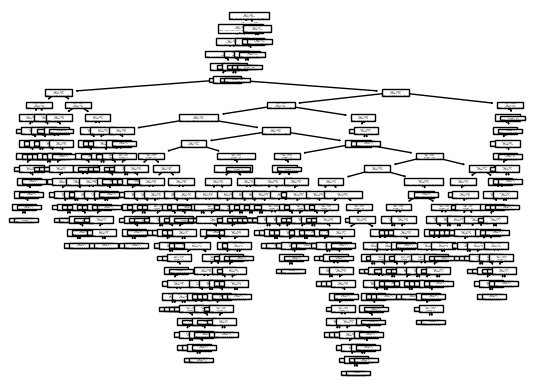

In [39]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
clf_pred_res = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_pred_res)

print(f'accuracy: {clf_accuracy}')
tree.plot_tree(clf)

2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9301470588235294


Variable Importance:
     Feature  Importance
0     length    0.360264
1     weight    0.347445
2  w_l_ratio    0.292291


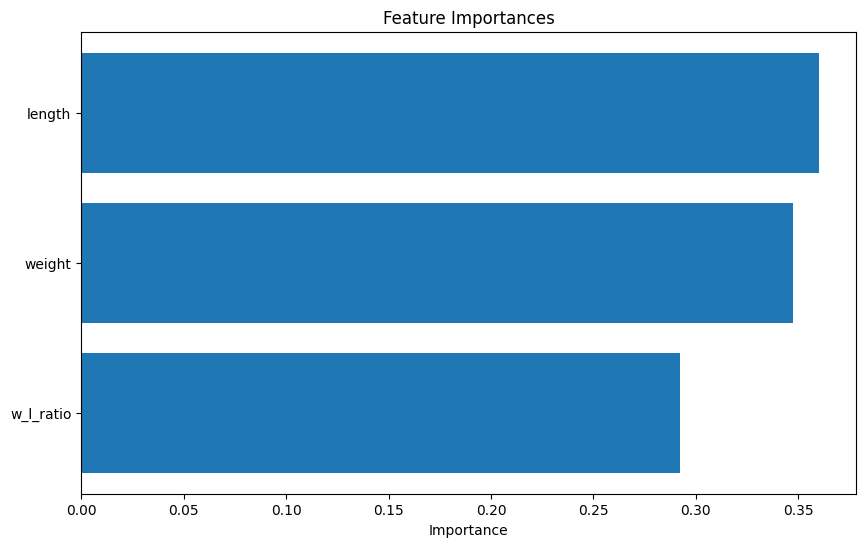

In [47]:
# Извлечение значимости переменных
feature_importances = model.feature_importances_

# Создание таблицы важности
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности переменных
print("Variable Importance:")
print(importance_df)

# Визуализация важности
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()


In [48]:
# Извлечение деревьев
n_estimators = len(model.estimators_)

print(f"Number of trees: {n_estimators}")
for i, tree in enumerate(model.estimators_[:, 0]):  # Только для первого класса в случае классификации
    print(f"Tree {i+1}:")
    print(tree)


Number of trees: 100
Tree 1:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 2:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 3:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 4:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 5:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 6:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x787092673640)
Tree 7:
DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState

3. Построить зависимость качества дерева решения (на кросс-валидации) от числа вершин дерева.


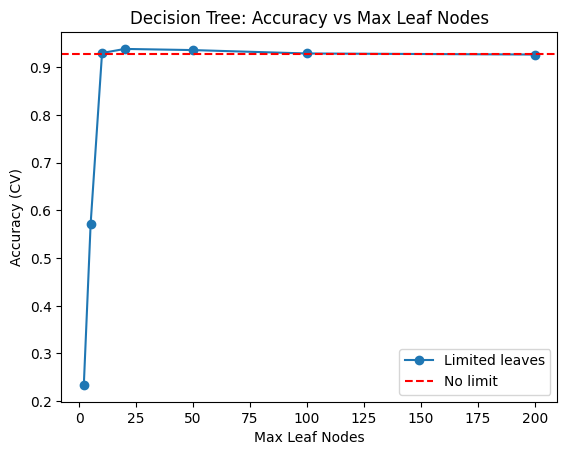

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Список максимальных вершин
max_leaf_nodes = [2, 5, 10, 20, 50, 100, 200, None]  # None = нет ограничения
scores = []

# Кросс-валидация для каждого числа вершин
for max_leaf in max_leaf_nodes:
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

# Построение графика
plt.plot(max_leaf_nodes[:-1], scores[:-1], marker='o', label='Limited leaves')
plt.axhline(scores[-1], color='r', linestyle='--', label='No limit')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy (CV)')
plt.title('Decision Tree: Accuracy vs Max Leaf Nodes')
plt.legend()
plt.show()


4. Для метода градиентного бустинга построить зависимость качества решения (на кросс-валидации) от числа деревьев.

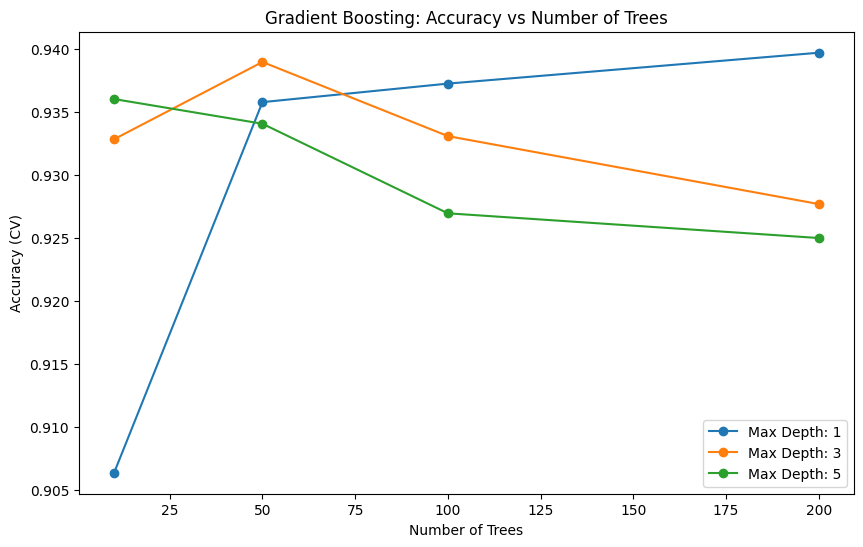

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_list = [10, 50, 100, 200]
max_depth_list = [1, 3, 5]
results = {}

# Кросс-валидация для разных комбинаций числа деревьев и глубины
for max_depth in max_depth_list:
    scores = []
    for n_estimators in n_estimators_list:
        model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        scores.append(cv_scores.mean())
    results[max_depth] = scores

plt.figure(figsize=(10, 6))
for max_depth, scores in results.items():
    plt.plot(n_estimators_list, scores, marker='o', label=f'Max Depth: {max_depth}')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (CV)')
plt.title('Gradient Boosting: Accuracy vs Number of Trees')
plt.legend()
plt.show()


5. Выполнить предыдущий пункт для случайного леса.


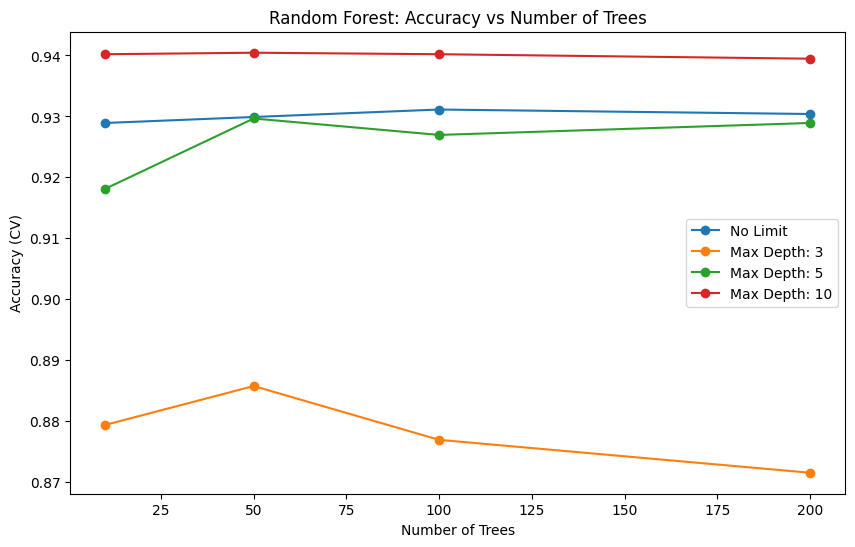

In [44]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 3, 5, 10]  # None = нет ограничения на глубину
results_rf = {}

# Кросс-валидация для разных комбинаций числа деревьев и глубины
for max_depth in max_depth_list:
    scores = []
    for n_estimators in n_estimators_list:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        scores.append(cv_scores.mean())
    results_rf[max_depth] = scores

# Построение графиков
plt.figure(figsize=(10, 6))
for max_depth, scores in results_rf.items():
    depth_label = 'No Limit' if max_depth is None else f'Max Depth: {max_depth}'
    plt.plot(n_estimators_list, scores, marker='o', label=depth_label)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy (CV)')
plt.title('Random Forest: Accuracy vs Number of Trees')
plt.legend()
plt.show()
